สมาชิก
1. นางสาวเครือวัลย์ เนตรพนา - 64199130036
2. นาย ชิน เลิศวิภาดา - 64199130039

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt     

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# make the plot appear without explicitly show()
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
# read data and store in DataFrame
url = 'https://raw.githubusercontent.com/jaochin/DS511-Data/main/bank-additional-full.csv'
df_bank = pd.read_csv(url,sep=';')

# **Exploratory Data Analysis (EDA)**



In [3]:
# simple explore
print("Shape of data :", df_bank.shape,'\n')
print("Type of data :\n", df_bank.dtypes,'\n')
df_bank.head()

Shape of data : (41188, 21) 

Type of data :
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The feature 'y' is a target.<br>
- 'yes' : client applied the product offered by bank
- 'no'  : client didn't apply the product offered by bank 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 



<AxesSubplot:>

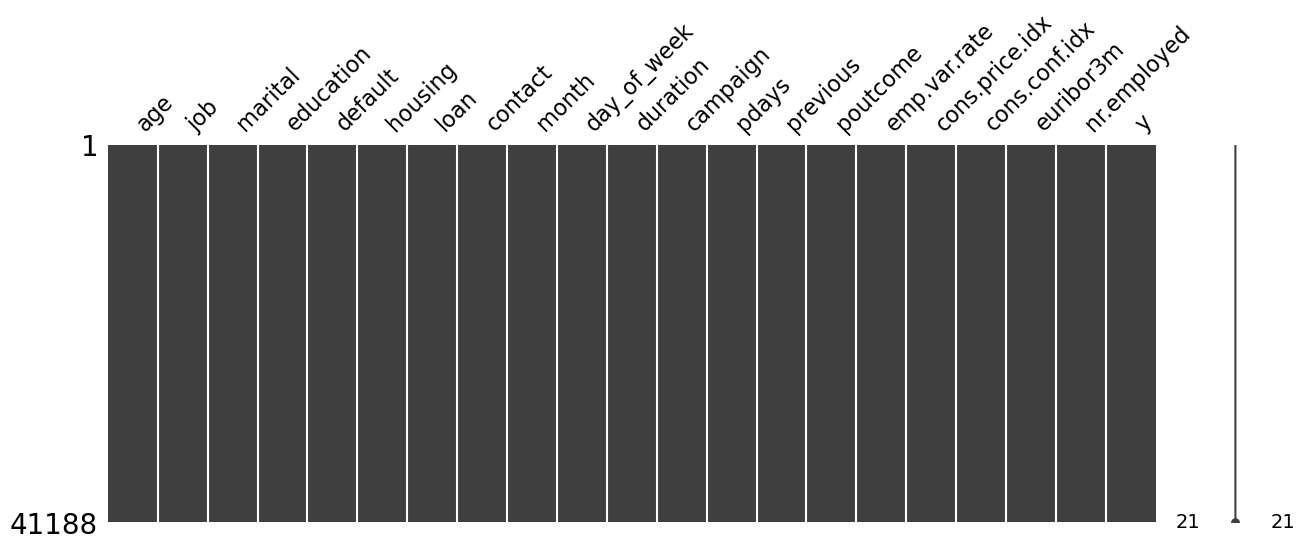

In [4]:
# check missing value
print(df_bank.isnull().sum(),'\n')
msno.matrix(df_bank, figsize=(15, 5))

Good news!<br>
We don't have any missing data.

In [5]:
# describe numerical data
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# describe categorical data
df_bank.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Most of the output data fall into class 'no'!<br>
We have the imbalance data.

In [7]:
# this feature 'duration' quite influence to the output class. So, let's explore this data
dur_tg_mean = df_bank['duration'].groupby(df_bank['y']).mean()
dur_tg_max = df_bank['duration'].groupby(df_bank['y']).max()
dur_tg_min = df_bank['duration'].groupby(df_bank['y']).min()

print('Mean duration of last contact: "say No!" = {:.2f} / "say Yes" = {:.2f} seconds'.format(dur_tg_mean['no'],dur_tg_mean['yes']))
print('Max duration of last contact : "say No!" = {:.2f} / "say Yes" = {:.2f} seconds'.format(dur_tg_max['no'],dur_tg_max['yes']))
print('Min duration of last contact : "say No!" = {:.2f} / "say Yes" = {:.2f} seconds'.format(dur_tg_min['no'],dur_tg_min['yes']))

Mean duration of last contact: "say No!" = 220.84 / "say Yes" = 553.19 seconds
Max duration of last contact : "say No!" = 4918.00 / "say Yes" = 4199.00 seconds
Min duration of last contact : "say No!" = 0.00 / "say Yes" = 37.00 seconds


***Insight!***<br>
This columns 'duration' is the duration of last call with the customer to confirm the result.<br>
Mean of duration time for people who say 'Yes' are significantly greater than people who say 'No'.

<AxesSubplot:ylabel='duration'>

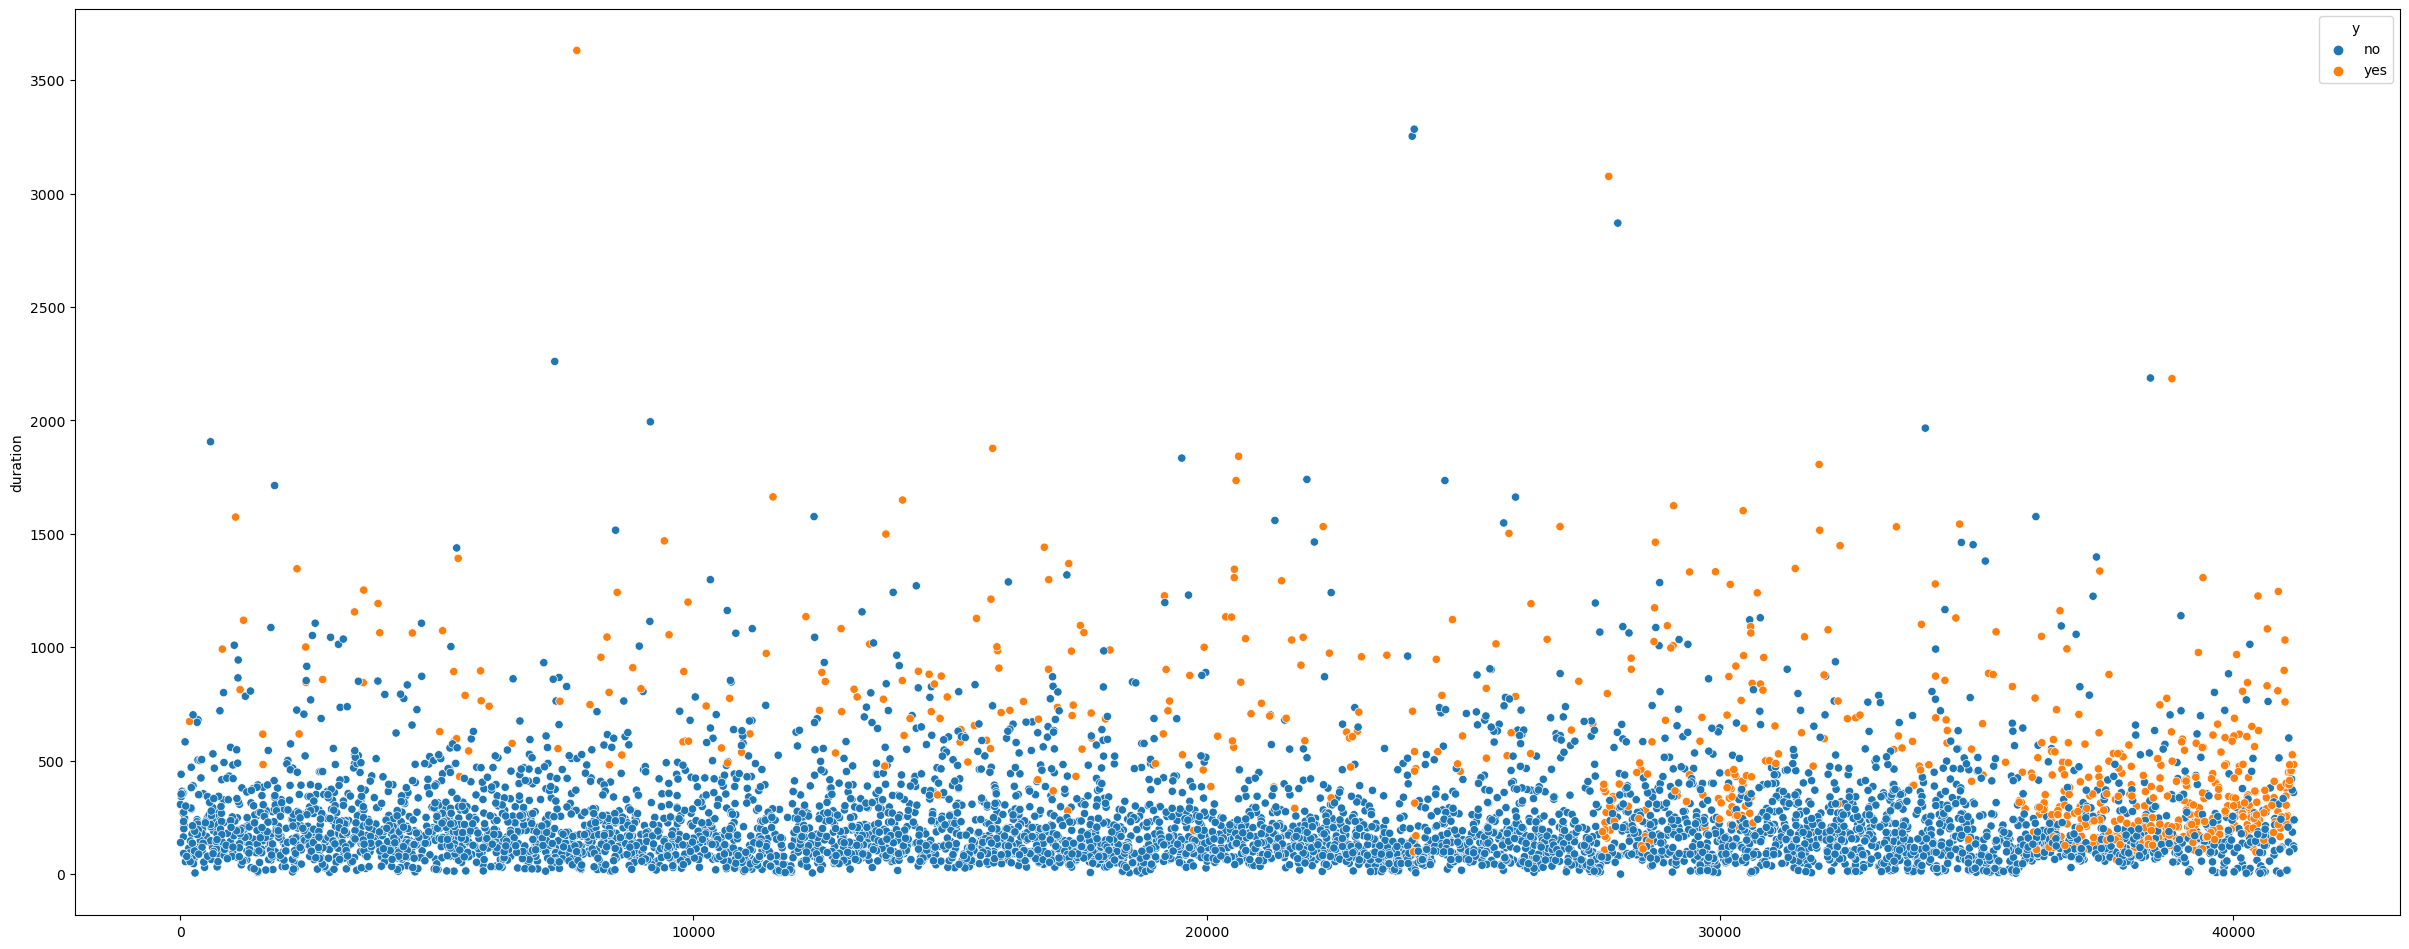

In [8]:
# let simply split the data and plot for having the vision of feature 'duration'
X_train, X_test, y_train, y_test = train_test_split(df_bank, df_bank.iloc[:,-1:], stratify=df_bank.iloc[:,-1:], test_size=0.85, random_state = 0)

fig, axs = plt.subplots(figsize=(30,12))
sns.scatterplot(ax=axs, data=X_train, x=X_train.index, y='duration', hue='y')

This plot supports above hypothesis.<br>

In [9]:
# drop feature 'duration' because it can make the model too fit with the data
df_bank.drop('duration', axis=1, inplace=True)

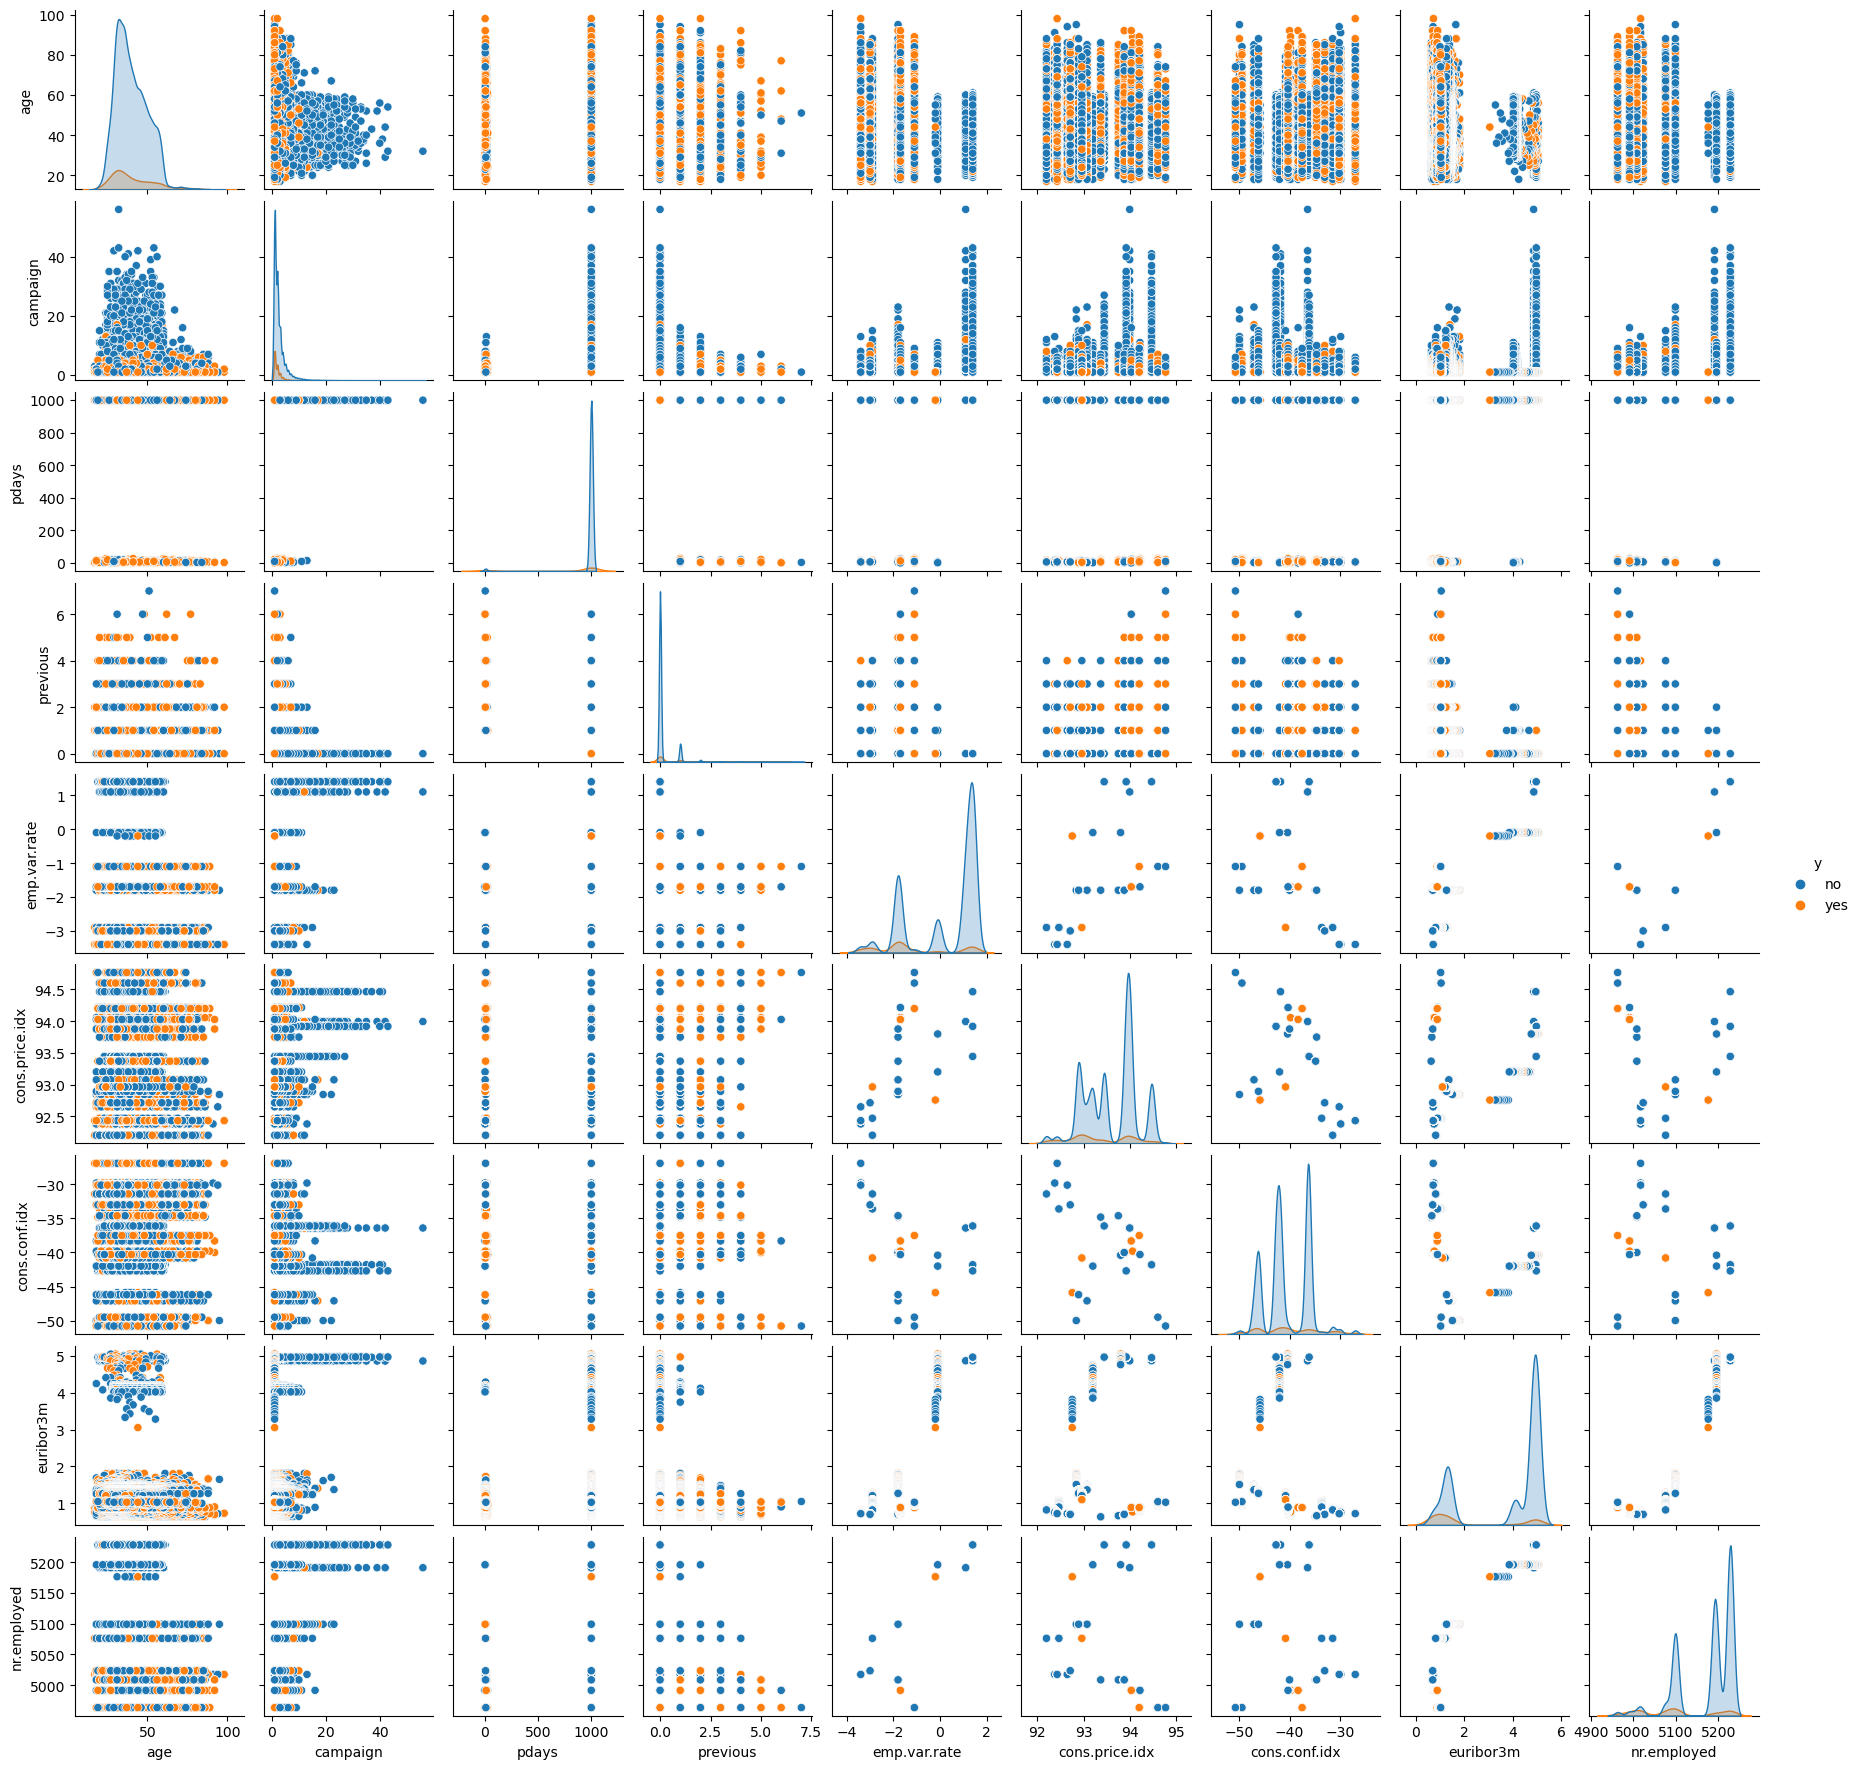

In [10]:
# inspect the relationship between each features
sns.pairplot(df_bank, height = 2 ,kind ='scatter',diag_kind='kde',hue='y')
plt.show()
plt.close()

<AxesSubplot:>

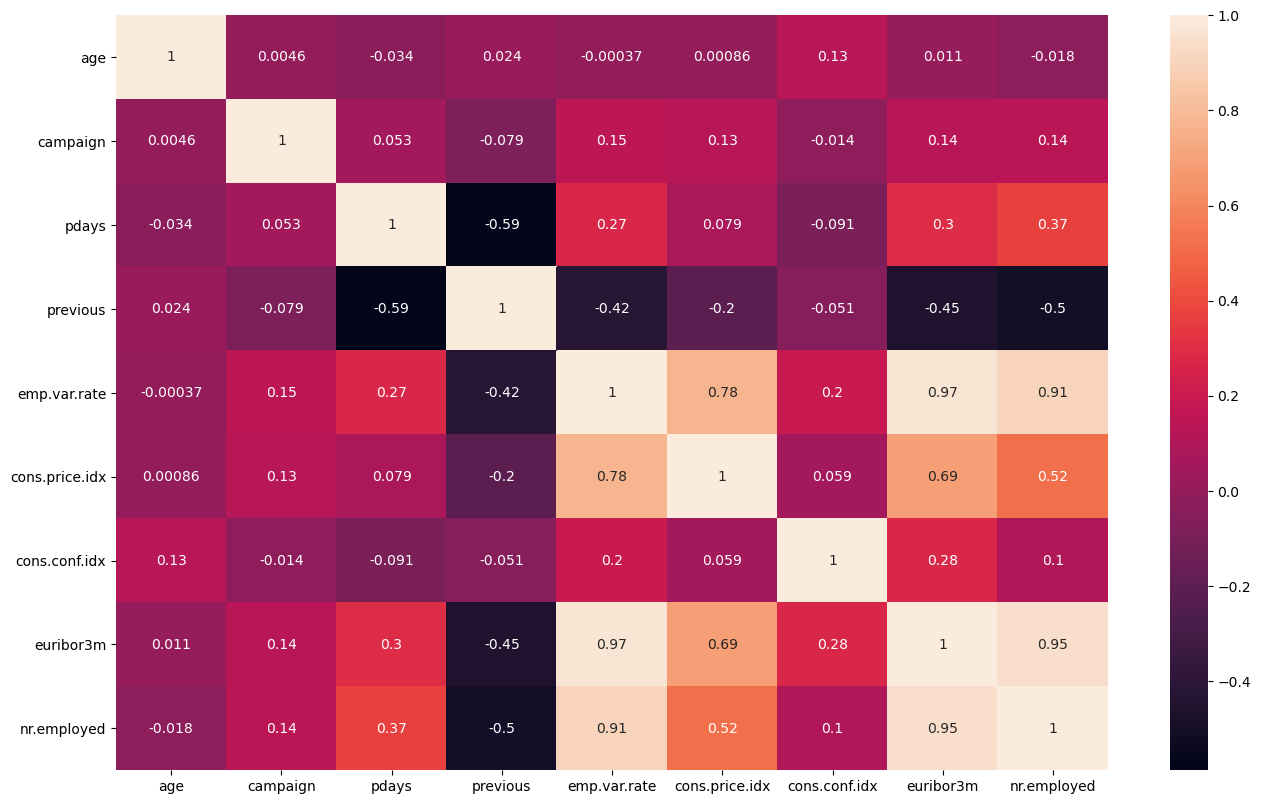

In [11]:
# inspect corrilation for those numerical features
df_bank_corr = df_bank.corr()

# plot the cross relationship between each pair
plt.figure(figsize=(16, 10))
sns.heatmap(data=df_bank_corr, annot=True)

Some pair of feature have very high correlation. We'll remove them. 

<AxesSubplot:>

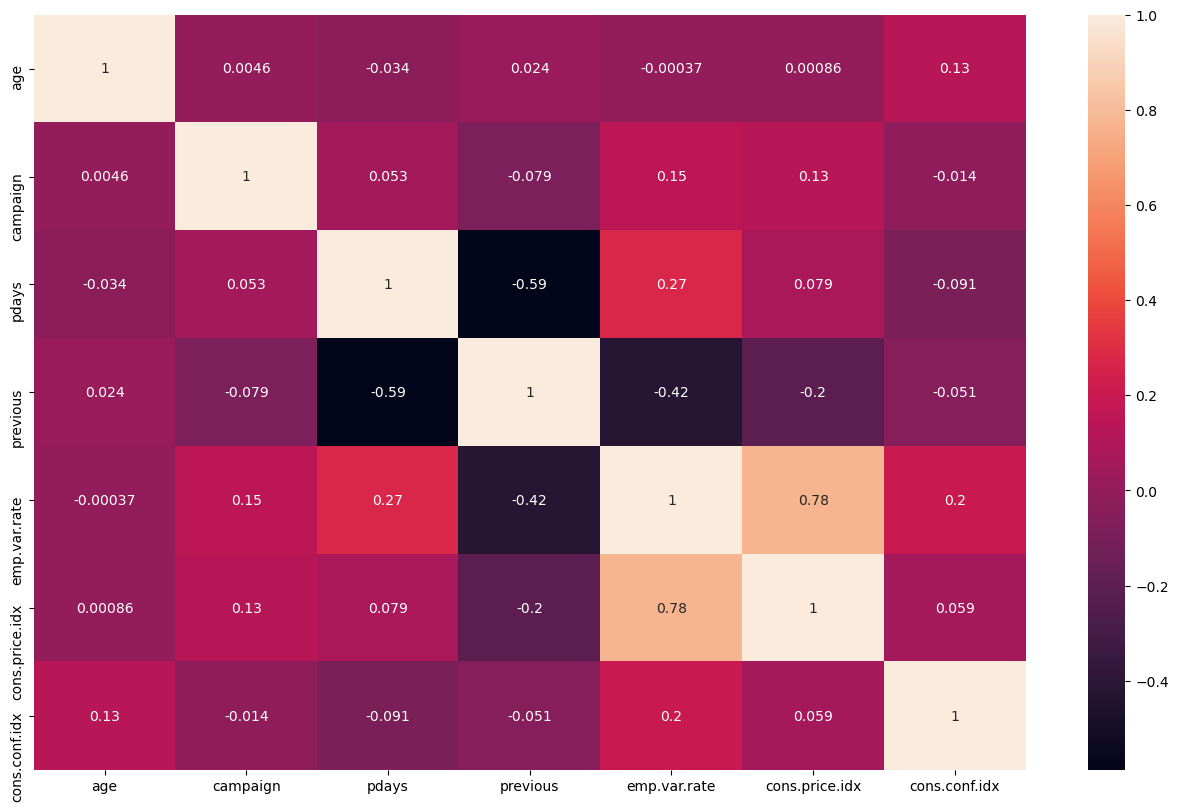

In [12]:
# finding high correlation > 0.9
col_high_corr=[]
for i in range(0,len(df_bank_corr.columns)):
  for j in range(i+1,len(df_bank_corr.columns)):
    if (df_bank_corr.iloc[i,j] > 0.9) and (df_bank_corr.columns[j] not in col_high_corr):
      col_high_corr.append(df_bank_corr.columns[j])

# drop those features which has high correlation
df_bank.drop(col_high_corr, axis=1, inplace=True)

# plot the heatmap again to see the result
plt.figure(figsize=(16, 10))
sns.heatmap(data=df_bank.corr(), annot=True)

In [13]:
# explore possible values and their frequency of categorical features
print(df_bank['job'].value_counts(),'\n')
print(df_bank['marital'].value_counts(),'\n')
print(df_bank['education'].value_counts(),'\n')
print(df_bank['default'].value_counts(),'\n')
print(df_bank['housing'].value_counts(),'\n')
print(df_bank['loan'].value_counts(),'\n')
print(df_bank['contact'].value_counts(),'\n')
print(df_bank['month'].value_counts(),'\n')
print(df_bank['day_of_week'].value_counts(),'\n')
print(df_bank['poutcome'].value_counts(),'\n')
print(df_bank['y'].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

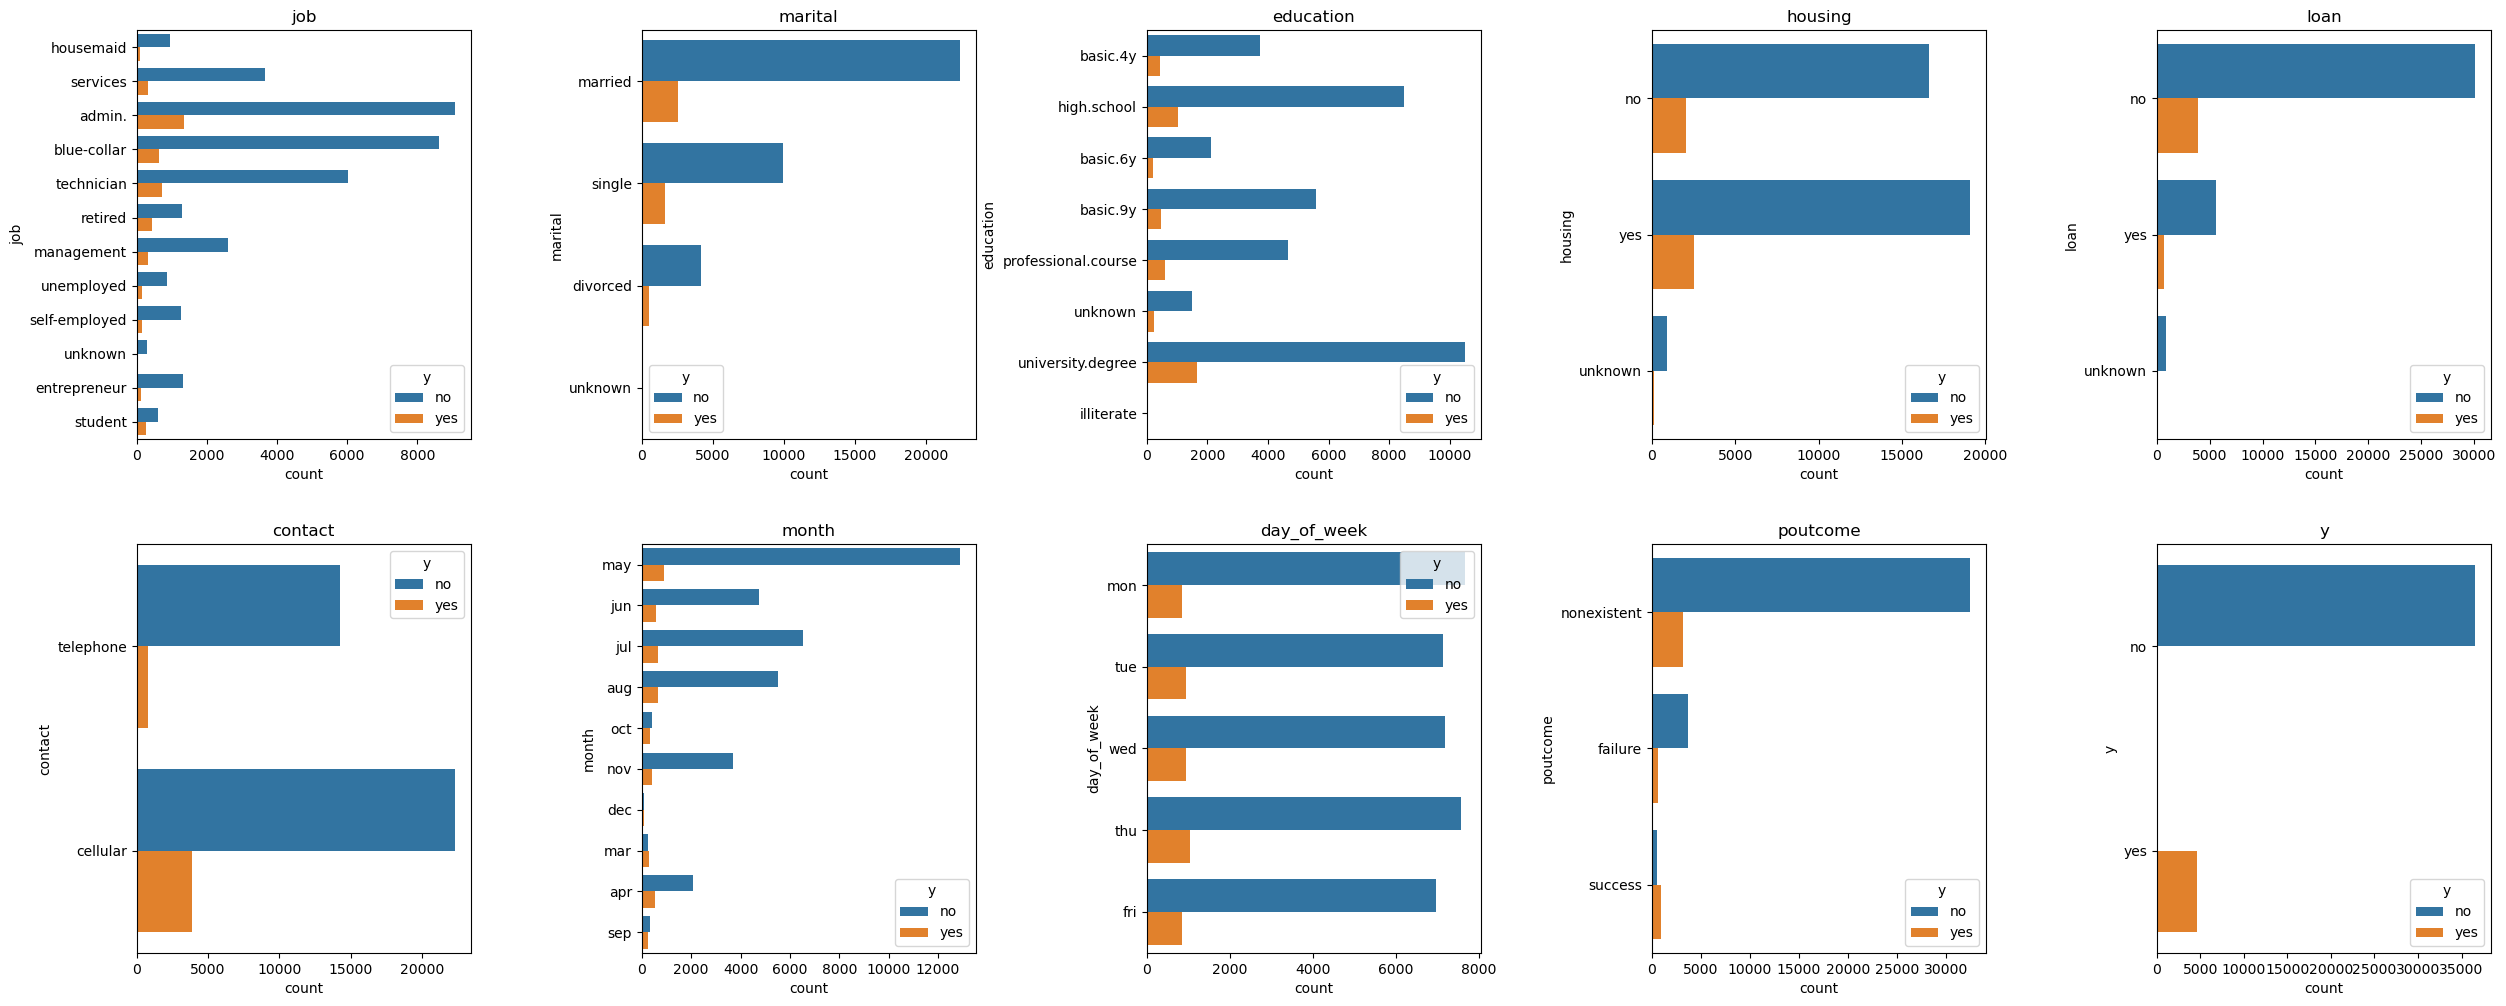

In [14]:
features_obj = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','y']

# plot counting chart of all categorical features
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_obj:
  sns.countplot(data=df_bank, y=k, ax=axs[index], hue='y')
  axs[index].set_title(k)
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

***Insight!***<br>
- People with job = 'student' seems to have the best ratio for applying the product.<br>
- In month = 'sep' seems to have the best ratio for applying the product. On the other hand month = 'may' gives the worst result.
- More than half of people whose applied last product offered by bank (poutcome = 'success'), apply for this product offering. 

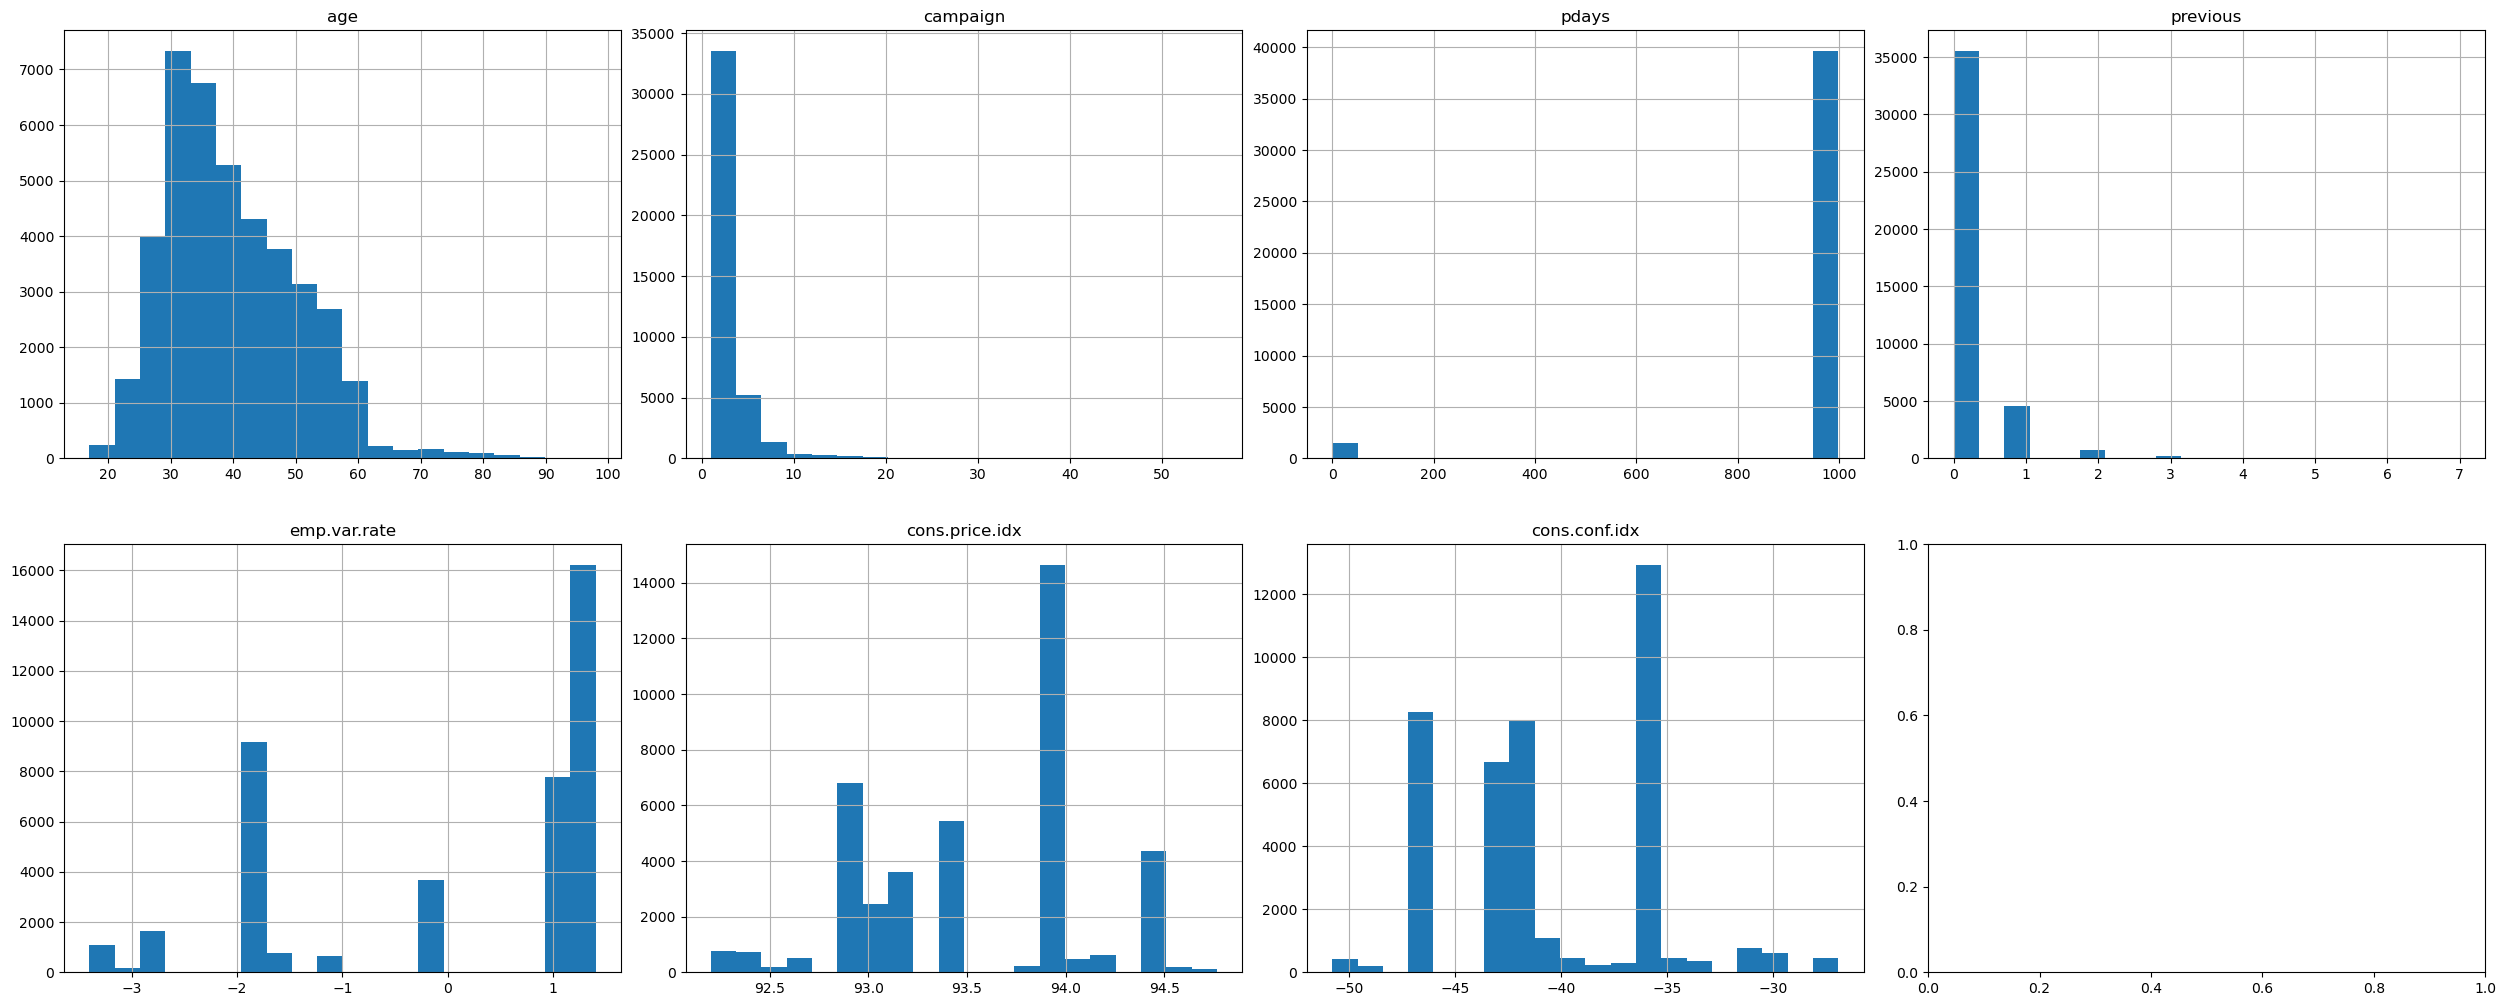

In [15]:
features_num = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx']

# plot distribution of all numerical features
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_num:
    df_bank[k].hist(bins=20, ax=axs[index])
    axs[index].set_title(k)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

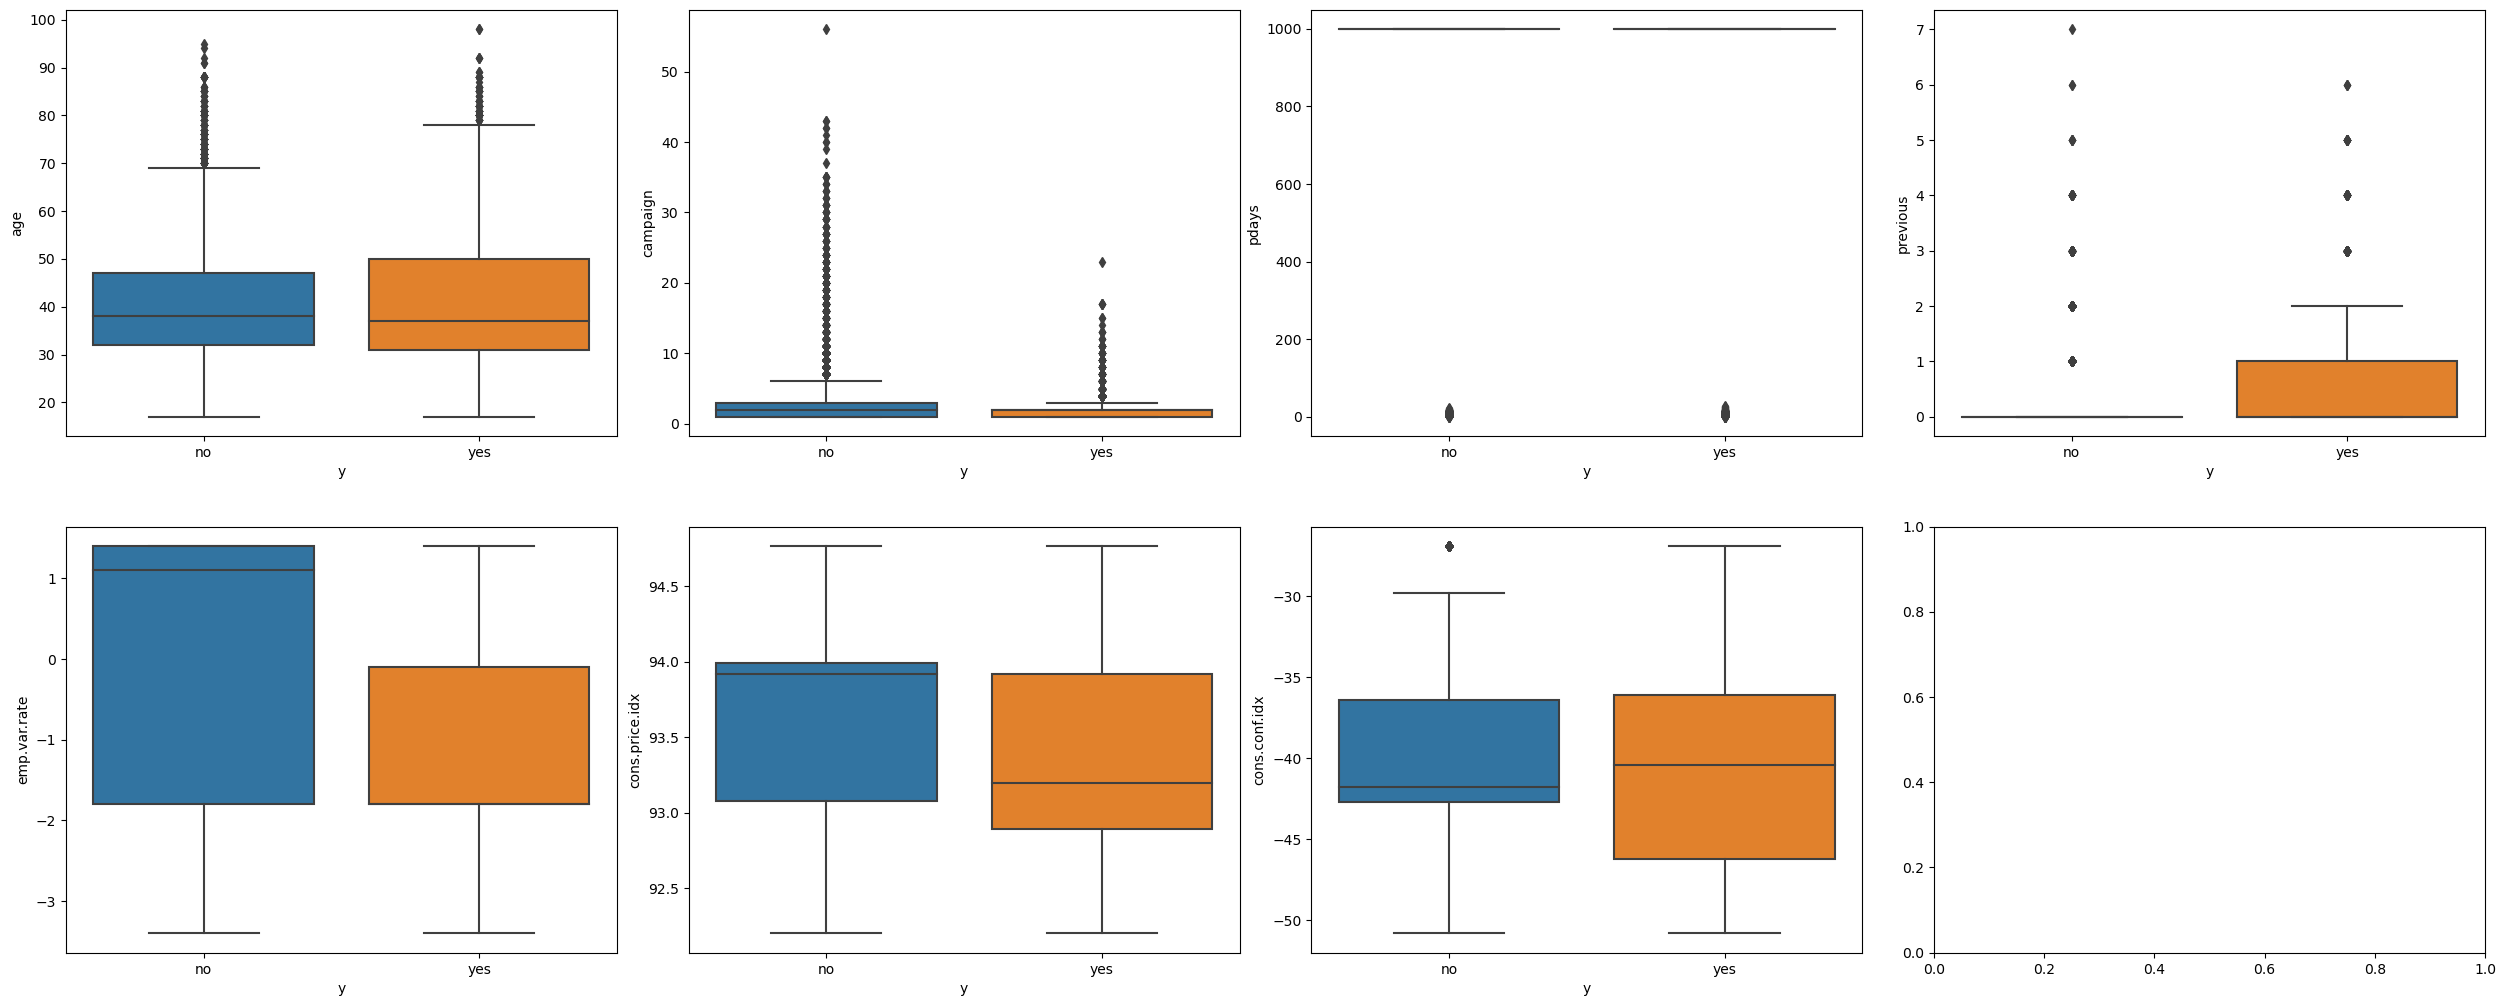

In [16]:
# plot boxplot of all numerical features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_num:
  sns.boxplot(data=df_bank, y=k, x='y', ax=axs[index])
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

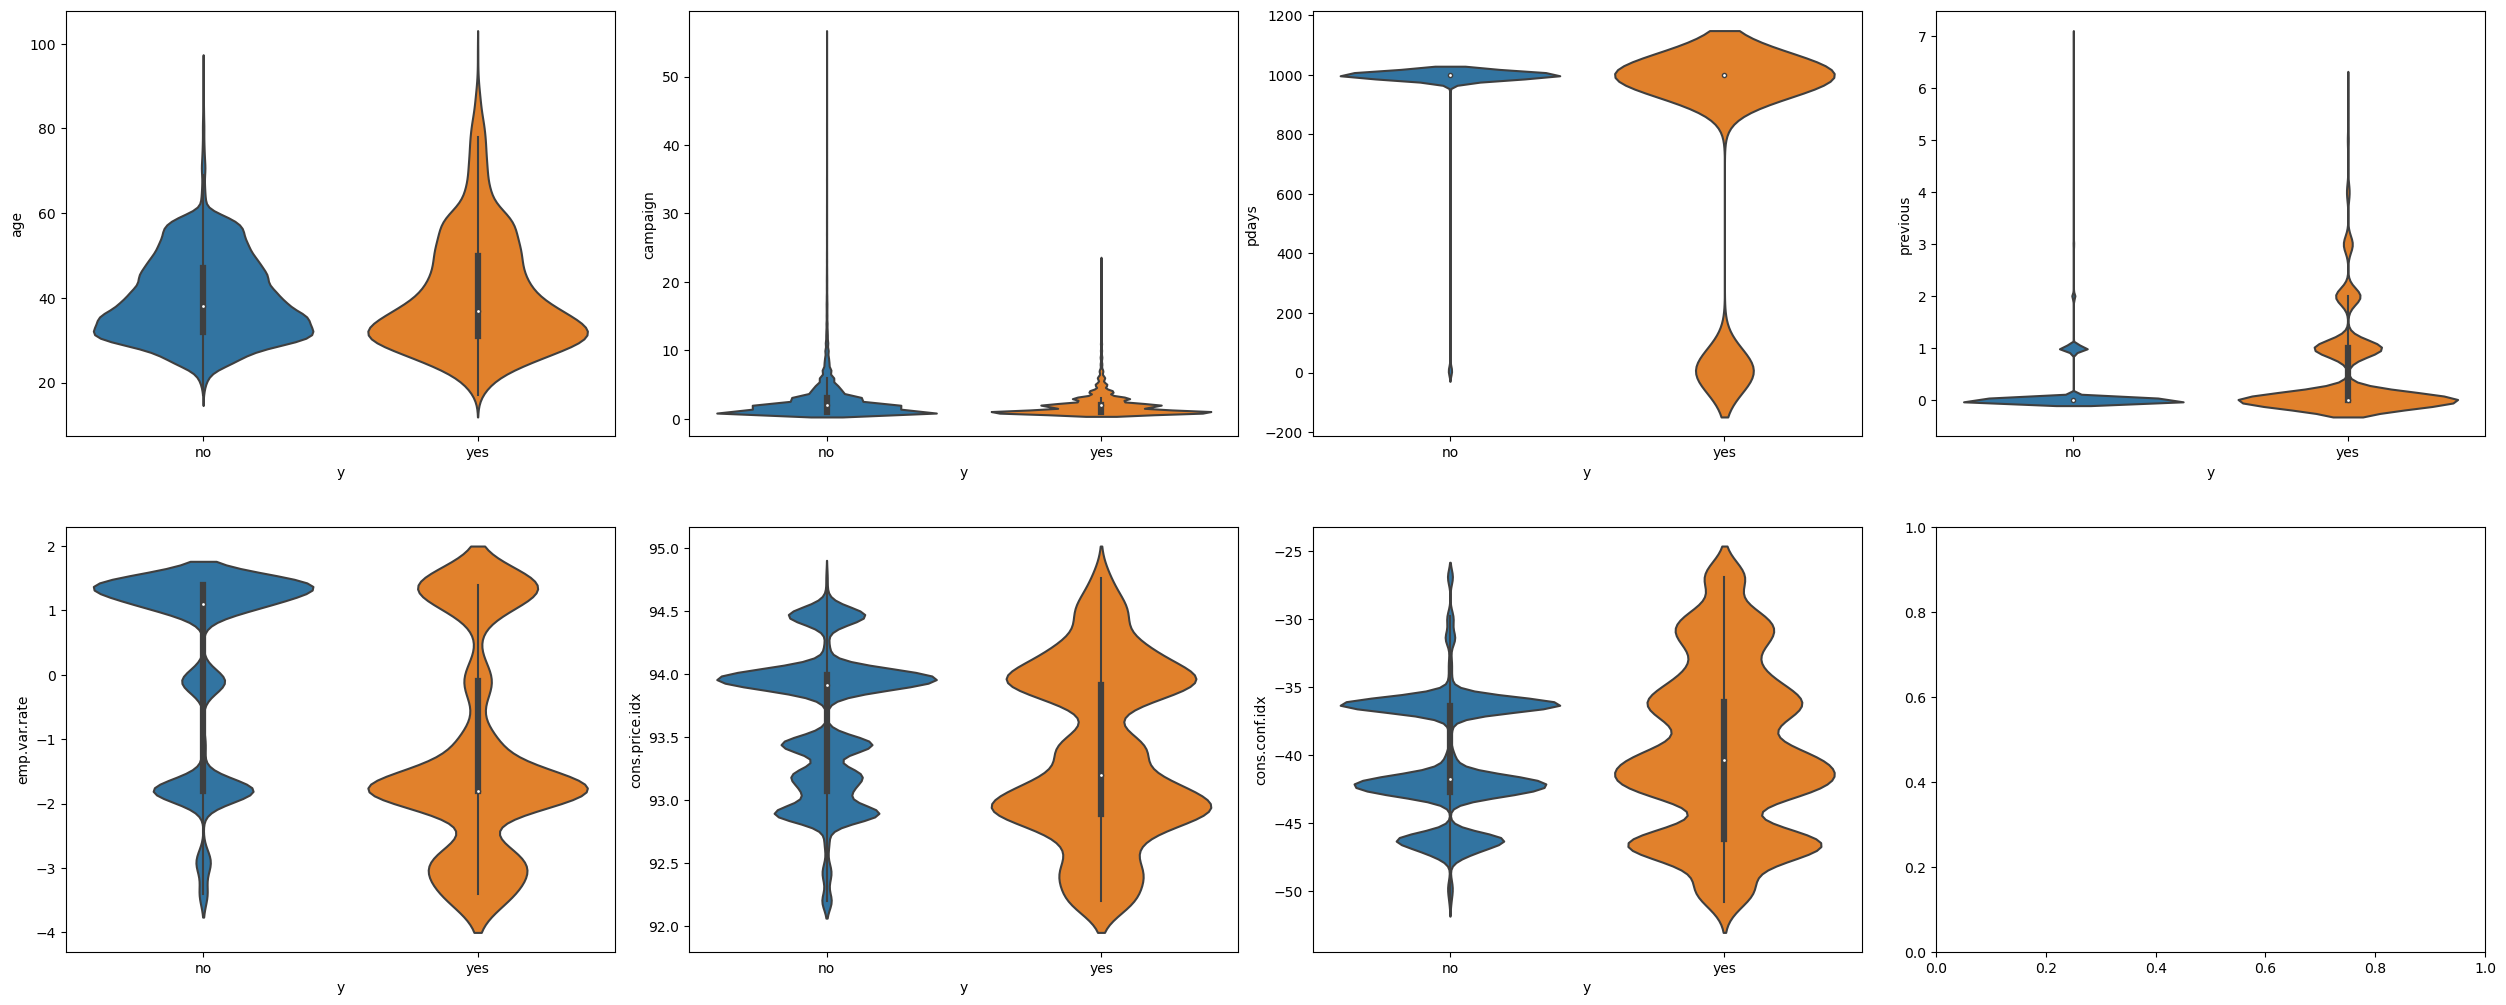

In [17]:
# plot violin of all numerical features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_num:
  sns.violinplot(x='y', y=k, data=df_bank, ax=axs[index], scale="width")
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

The distribution are abnormal, we'll need the standardize.

In [18]:
# it seems we can impute the feature 'job' by feature 'age'. let's find mean 'age' for each 'job'
print('admin. age:',df_bank['age'][df_bank['job'] == 'admin.'].mean())
print('blue-collar age:',df_bank['age'][df_bank['job'] == 'blue-collar'].mean())
print('technician age:',df_bank['age'][df_bank['job'] == 'technician'].mean())
print('services age:',df_bank['age'][df_bank['job'] == 'services'].mean())
print('management age:',df_bank['age'][df_bank['job'] == 'management'].mean())
print('retired age:',df_bank['age'][df_bank['job'] == 'retired'].mean())
print('entrepreneur age:',df_bank['age'][df_bank['job'] == 'entrepreneur'].mean())
print('self-employed age:',df_bank['age'][df_bank['job'] == 'self-employed'].mean())
print('housemaid age:',df_bank['age'][df_bank['job'] == 'housemaid'].mean())
print('unemployed age:',df_bank['age'][df_bank['job'] == 'unemployed'].mean())
print('student age:',df_bank['age'][df_bank['job'] == 'student'].mean())

admin. age: 38.18729610439455
blue-collar age: 39.555759671493405
technician age: 38.5076375500519
services age: 37.92642983119173
management age: 42.36285909712722
retired age: 62.027325581395345
entrepreneur age: 41.723214285714285
self-employed age: 39.94933145672062
housemaid age: 45.5
unemployed age: 39.73372781065089
student age: 25.89485714285714


Seems we can impute for 'student' and 'retired' who are min and max of the range.

In [19]:
# impute job 'student' and 'retired' by age
mask_student = (df_bank['age'] <= (df_bank['age'][df_bank['job'] == 'student'].mean())) & (df_bank['job'] == 'unknown')
mask_retired = (df_bank['age'] >= (df_bank['age'][df_bank['job'] == 'retired'].mean())) & (df_bank['job'] == 'unknown')

df_bank.loc[mask_student,'job'] = 'student'
df_bank.loc[mask_retired,'job'] = 'retired'

In [20]:
# find the max of feature 'pdays' which isn't 999
print(sorted(df_bank['pdays'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 999]


Feature 'pdays' is telling the duration (days) from the last contact to client.<br>
The value '999' means this client never been contacted.<br>
The max normal value is '27'. So, we decided to make this feature to be categorical instead.

In [21]:
# transform duration (day) after last contact to client from numeric to category
df_bank['pdays'] = ['no' if pdays == 999 else 'yes' for pdays in df_bank['pdays']]

In [22]:
# again, simply explore after EDA
print('Shape of dataframe:', df_bank.shape, '\n')
print(df_bank.dtypes,'\n')
df_bank.head()

Shape of dataframe: (41188, 18) 

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays              object
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
y                  object
dtype: object 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no


# **Split & Transform the data**

In [23]:
# select Features
X = df_bank.drop('y', axis=1)
# select Target
y = df_bank['y']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 0)

In [24]:
## create pipeline

# list for ordinalEncoder of feature 'education'
edu_list = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

# declare pipeline for data pre-procession
pipe_cate = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False))])
pipe_num = Pipeline([('imputer',SimpleImputer(strategy='mean')), ('std',StandardScaler())])
pipe_ord = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('ord',OrdinalEncoder(categories=[edu_list]))])

# declare columnTransformer to include these above pipelines
preproc_X = ColumnTransformer([
     ('cate', pipe_cate, ['job','marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']),
     ('norm', pipe_num, ['age', 'campaign', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx']),
     ('ord', pipe_ord, ['education'])
     ], remainder='passthrough')

In [25]:
## transform target value to the numerical value using labelEncoder

lb_enc = LabelEncoder()

# transform y_train
y_train_tran = lb_enc.fit_transform(y_train)
# transform y_test
y_test_tran = lb_enc.transform(y_test)

# **Create model (GridSearchCV)**

**Logistic Regression with default parameters**

In [26]:
# gridsearchCV for logisticRegression with default parameters (cv=10)
logreg = LogisticRegression(random_state=0,solver='liblinear',max_iter=5000)

pipe_logreg = Pipeline([('prepro',preproc_X), ('logreg',logreg)])
param_grid = {}

logreg_dft = GridSearchCV(pipe_logreg, param_grid=param_grid, cv=10)
logreg_dft.fit(X_train,y_train_tran)

predict_logreg_dft = logreg_dft.predict(X_test)

print("Train Accuracy :", logreg_dft.best_score_)
print("Test Accuracy :", accuracy_score(predict_logreg_dft, y_test_tran), '\n')
print("Classification Report :\n", classification_report(predict_logreg_dft, y_test_tran))

Train Accuracy : 0.9002427921092565
Test Accuracy : 0.8997329448895363 

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      7906
           1       0.23      0.65      0.34       332

    accuracy                           0.90      8238
   macro avg       0.61      0.78      0.65      8238
weighted avg       0.95      0.90      0.92      8238



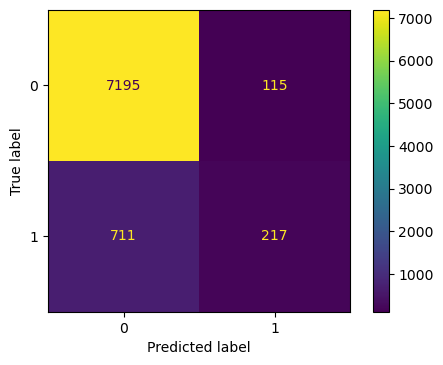

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_logreg_dft)

**Logistic Regression with tuning parameters**

In [28]:
# gridsearchCV for logisticRegression with tuning parameters (cv=10)
logreg = LogisticRegression(random_state=0,solver='liblinear',max_iter=5000)

pipe_logreg = Pipeline([('prepro',preproc_X), ('logreg',logreg)])
param_grid = {'logreg__C': np.logspace(-4, 3, 20), 'logreg__penalty':['l1', 'l2']}

logreg_param = GridSearchCV(pipe_logreg, param_grid=param_grid, cv=10)
logreg_param.fit(X_train,y_train_tran)

predict_logreg_param = logreg_param.predict(X_test)

print("Best param :", logreg_param.best_params_)
print("Train Accuracy :", logreg_param.best_score_)
print("Test Accuracy :", accuracy_score(predict_logreg_param, y_test_tran), '\n')
print("Classification Report :\n", classification_report(predict_logreg_param, y_test_tran))

Best param : {'logreg__C': 0.08858667904100823, 'logreg__penalty': 'l1'}
Train Accuracy : 0.9007890743550833
Test Accuracy : 0.9007040543821316 

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      7926
           1       0.23      0.68      0.34       312

    accuracy                           0.90      8238
   macro avg       0.61      0.79      0.64      8238
weighted avg       0.96      0.90      0.92      8238



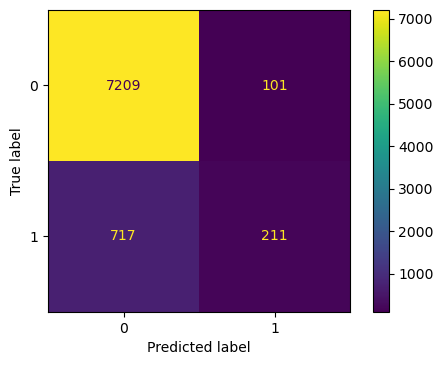

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_logreg_param)

**K-Neighbors with default parameters**

In [30]:
# gridsearchCV for k-neighbors with default parameters (cv=10)
knn = KNeighborsClassifier()

pipe_knn = Pipeline([('prepro',preproc_X), ('knn',knn)])
param_grid = {}

knn_dft = GridSearchCV(pipe_knn, param_grid=param_grid, cv=10)
knn_dft.fit(X_train, y_train_tran)

predict_knn_dft = knn_dft.predict(X_test)

print("Train Accuracy :", knn_dft.best_score_)
print("Test Accuracy :", accuracy_score(predict_knn_dft, y_test_tran), '\n')
print("Classification Report :\n", classification_report(predict_knn_dft, y_test_tran), '\n')

Train Accuracy : 0.8905311077389986
Test Accuracy : 0.8854090798737557 

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7728
           1       0.27      0.48      0.34       510

    accuracy                           0.89      8238
   macro avg       0.62      0.70      0.64      8238
weighted avg       0.92      0.89      0.90      8238
 



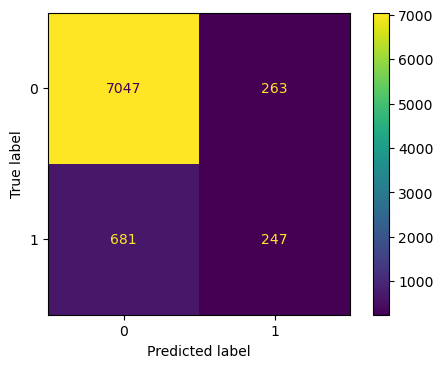

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_knn_dft)

**K-Neighbors with tuning parameters**

In [32]:
# gridsearchCV for k-neighbors with default parameters (cv=10)
knn = KNeighborsClassifier()

pipe_knn = Pipeline([('prepro',preproc_X), ('knn',knn)])
param_grid = {'knn__n_neighbors':range(15, 36, 2), 'knn__p':[1,2]}

knn_param = GridSearchCV(pipe_knn, param_grid=param_grid, cv=10)
knn_param.fit(X_train, y_train_tran)

predict_knn_param = knn_param.predict(X_test)

print("Best param :", knn_param.best_params_)
print("Train Accuracy :", knn_param.best_score_)
print("Test Accuracy :", accuracy_score(predict_knn_param, y_test_tran), '\n')
print("Classification Report :\n", classification_report(predict_knn_param, y_test_tran))

Best param : {'knn__n_neighbors': 31, 'knn__p': 2}
Train Accuracy : 0.8985128983308043
Test Accuracy : 0.8957271182325808 

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      7905
           1       0.22      0.60      0.32       333

    accuracy                           0.90      8238
   macro avg       0.60      0.76      0.63      8238
weighted avg       0.95      0.90      0.92      8238



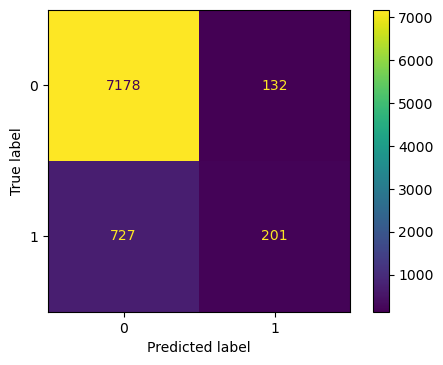

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_knn_param)

**SVC with default parameters**

In [34]:
# gridsearchCV for SVC with default parameters (cv=10)
svc = SVC()

pipe_svc = Pipeline([('prepro',preproc_X), ('svc',svc)])
param_grid = {}

svc_dft = GridSearchCV(pipe_svc, param_grid=param_grid, cv=10)
svc_dft.fit(X_train,y_train_tran)

predict_svc_dft = svc_dft.predict(X_test)

print("Train Accuracy :", svc_dft.best_score_)
print("Test Accuracy :", accuracy_score(predict_svc_dft, y_test_tran), '\n')
print("Classification Report :\n", classification_report(predict_svc_dft, y_test_tran), '\n')

Train Accuracy : 0.8985432473444612
Test Accuracy : 0.8982762806506434 

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      7982
           1       0.19      0.68      0.29       256

    accuracy                           0.90      8238
   macro avg       0.59      0.79      0.62      8238
weighted avg       0.96      0.90      0.92      8238
 



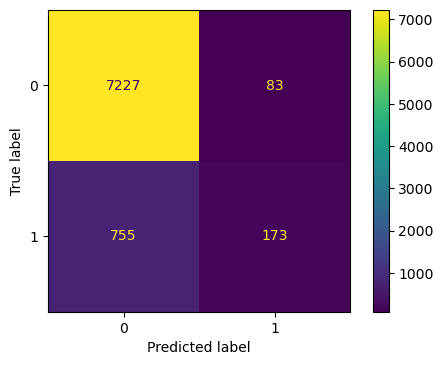

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_svc_dft)

**SVC with tuning parameters**

In [36]:
# gridsearchCV for SVC with tuning parameters (cv=5)
svc = SVC() 

pipe_svc = Pipeline([('prepro',preproc_X), ('svc',svc)])
param_grid = {'svc__kernel': ['rbf','poly','linear','sigmoid']}

svc_param = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5)
svc_param.fit(X_train,y_train_tran)

predict_svc_param = svc_param.predict(X_test)

print("Best param :", svc_param.best_params_)
print("Train Accuracy :", svc_param.best_score_)
print("Test Accuracy :", accuracy_score(predict_svc_param, y_test_tran), '\n')
print("Classification Report :\n", classification_report(predict_svc_param, y_test_tran))

Best param : {'svc__kernel': 'poly'}
Train Accuracy : 0.898877086494689
Test Accuracy : 0.8986404467103666 

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      7997
           1       0.18      0.69      0.29       241

    accuracy                           0.90      8238
   macro avg       0.58      0.80      0.62      8238
weighted avg       0.97      0.90      0.93      8238



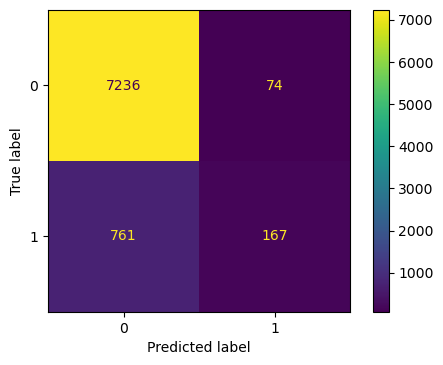

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_svc_param)